In [60]:
from google.colab import drive
drive.mount('/content/gdrive')
import os
os.chdir('/content/gdrive/My Drive/Data Analysis')
print(os.listdir(os.getcwd()))

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
['data', 'Top 20 Businesses Frequented by VIPs.png', 'Data Preprocessing.ipynb', 'business categories with most reviews from vips.ipynb', 'predict rating (1).ipynb', 'processed_attributes_round8.csv', 'processed_attributes_round13.csv', 'business.json', 'predict rating.ipynb', 'x_round8.csv', 'y_round8.csv', 'bydegree.gephi (Unzipped Files)', 'Q1', 'Q2', ' Q3 regression', 'Q4 Predictive model', 'Q5  Network', 'Untitled0.ipynb', 'feature importance for restaurant.png', 'feature importance for bs.png', 'Restaurants attract users with lots of fans.ipynb', ' Q4 Predictive model']


In [0]:
import numpy as np
import pandas as pd
import math
from sklearn.utils import resample
from sklearn.preprocessing import LabelEncoder
from sklearn.base import TransformerMixin
from pandas.io.json import json_normalize
import itertools
import json
from pandas.io.json import json_normalize
from tqdm import tqdm_notebook as tqdm

In [0]:
pd.set_option('display.max_columns', 100)

In [65]:
file = 'business'
business = pd.read_csv('data/round8/csv/business.csv', low_memory=False)
print(file+' is successfully loaded')
print('No. of business: ',len(business))
business = business[business['state'].astype(str).str.contains('AZ')]
print('No. of business in AZ: ',len(business))
# business = business[business['categories'].str.contains("Restaurants")]


# business=business.drop(columns=['business_id','full_address','hours','latitude','longitude','name','neighborhoods','open'])
# print("columns 'business_id','full_address','hours','latitude','longitude','name','neighborhoods','open' are dropped")

business is successfully loaded
No. of business:  85901
No. of business in AZ:  36500


In [0]:
# business["attributes"].todict()
business["attributes"] = business["attributes"].apply(lambda x : dict(eval(x)) )
business = pd.DataFrame(business['attributes'].values.tolist(), index=business.index)
# business = business["attributes"].apply(pd.Series )

In [67]:
len(business.columns)

36

In [68]:
business.columns

Index(['Accepts Credit Cards', 'Accepts Insurance', 'Ages Allowed', 'Alcohol',
       'Ambience', 'Attire', 'BYOB', 'BYOB/Corkage', 'By Appointment Only',
       'Caters', 'Coat Check', 'Corkage', 'Delivery', 'Dietary Restrictions',
       'Dogs Allowed', 'Drive-Thru', 'Good For', 'Good For Dancing',
       'Good For Groups', 'Good for Kids', 'Hair Types Specialized In',
       'Happy Hour', 'Has TV', 'Music', 'Noise Level', 'Open 24 Hours',
       'Order at Counter', 'Outdoor Seating', 'Parking', 'Price Range',
       'Smoking', 'Take-out', 'Takes Reservations', 'Waiter Service',
       'Wheelchair Accessible', 'Wi-Fi'],
      dtype='object')

In [0]:
business = json_normalize(business.to_dict('records'))

In [0]:
business.info()

In [0]:
business=business.drop(columns=['Ambience','Good For','Music','Parking','Dietary Restrictions'])

In [10]:
business.head()

,Accepts Credit Cards,Accepts Insurance,Ages Allowed,Alcohol,Ambience.casual,Ambience.classy,Ambience.divey,Ambience.hipster,Ambience.intimate,Ambience.romantic,Ambience.touristy,Ambience.trendy,Ambience.upscale,Attire,BYOB,BYOB/Corkage,By Appointment Only,Caters,Coat Check,Corkage,Delivery,Dietary Restrictions.dairy-free,Dietary Restrictions.gluten-free,Dietary Restrictions.halal,Dietary Restrictions.kosher,Dietary Restrictions.soy-free,Dietary Restrictions.vegan,Dietary Restrictions.vegetarian,Dogs Allowed,Drive-Thru,Good For Dancing,Good For Groups,Good For.breakfast,Good For.brunch,Good For.dessert,Good For.dinner,Good For.latenight,Good For.lunch,Good for Kids,Happy Hour,Has TV,Music.background_music,Music.dj,Music.jukebox,Music.karaoke,Music.live,Music.video,Noise Level,Open 24 Hours,Order at Counter,Outdoor Seating,Parking.garage,Parking.lot,Parking.street,Parking.valet,Parking.validated,Price Range,Smoking,Take-out,Takes Reservations,Waiter Service,Wheelchair Accessible,Wi-Fi
0,True,NaN,NaN,none,False,False,False,False,False,False,False,False,False,casual,NaN,NaN,NaN,False,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False,False,False,False,True,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,loud,NaN,NaN,False,False,True,False,False,False,1.0,NaN,True,False,False,True,no
1,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,quiet,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,True,False,NaN,NaN,NaN
2,True,NaN,21plus,full_bar,True,False,False,False,False,False,False,False,False,casual,NaN,NaN,NaN,False,False,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,True,True,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,very_loud,NaN,NaN,True,True,False,False,False,False,1.0,outdoor,False,True,False,True,no
3,True,NaN,NaN,full_bar,True,False,False,False,False,False,False,False,False,casual,NaN,NaN,NaN,True,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,False,False,False,True,False,False,True,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,average,NaN,NaN,True,False,True,False,False,False,2.0,NaN,True,True,True,True,free
4,True,NaN,NaN,full_bar,True,False,False,False,False,False,False,False,False,casual,NaN,NaN,NaN,False,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,False,False,False,True,False,False,True,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,average,False,False,True,True,False,False,False,False,2.0,NaN,True,True,True,True,no


In [0]:
list(business.columns)

In [0]:
business.isna().sum()

In [71]:
remove_feature = []
for feature in tqdm(list(business.columns)):
  if sum(pd.isnull(business[feature])) / len(business) > 0.7:
    remove_feature.append(feature)

In [72]:
remove_feature

['Accepts Insurance',
 'Ages Allowed',
 'Alcohol',
 'Ambience.casual',
 'Ambience.classy',
 'Ambience.divey',
 'Ambience.hipster',
 'Ambience.intimate',
 'Ambience.romantic',
 'Ambience.touristy',
 'Ambience.trendy',
 'Ambience.upscale',
 'Attire',
 'BYOB',
 'BYOB/Corkage',
 'By Appointment Only',
 'Caters',
 'Coat Check',
 'Corkage',
 'Delivery',
 'Dietary Restrictions.dairy-free',
 'Dietary Restrictions.gluten-free',
 'Dietary Restrictions.halal',
 'Dietary Restrictions.kosher',
 'Dietary Restrictions.soy-free',
 'Dietary Restrictions.vegan',
 'Dietary Restrictions.vegetarian',
 'Dogs Allowed',
 'Drive-Thru',
 'Good For Dancing',
 'Good For Groups',
 'Good For.breakfast',
 'Good For.brunch',
 'Good For.dessert',
 'Good For.dinner',
 'Good For.latenight',
 'Good For.lunch',
 'Hair Types Specialized In',
 'Hair Types Specialized In.africanamerican',
 'Hair Types Specialized In.asian',
 'Hair Types Specialized In.coloring',
 'Hair Types Specialized In.curly',
 'Hair Types Specialized In

In [0]:
business=business.drop(columns=remove_feature)

In [74]:
business.columns

Index(['Accepts Credit Cards', 'Good for Kids', 'Parking.garage',
       'Parking.lot', 'Parking.street', 'Parking.valet', 'Parking.validated',
       'Price Range'],
      dtype='object')

In [16]:
business.head()

,Accepts Credit Cards,Alcohol,Ambience.casual,Ambience.classy,Ambience.divey,Ambience.hipster,Ambience.intimate,Ambience.romantic,Ambience.touristy,Ambience.trendy,Ambience.upscale,Attire,Caters,Delivery,Good For Groups,Good For.breakfast,Good For.brunch,Good For.dessert,Good For.dinner,Good For.latenight,Good For.lunch,Good for Kids,Has TV,Noise Level,Outdoor Seating,Parking.garage,Parking.lot,Parking.street,Parking.valet,Parking.validated,Price Range,Take-out,Takes Reservations,Waiter Service,Wheelchair Accessible,Wi-Fi
0,True,none,False,False,False,False,False,False,False,False,False,casual,False,True,False,False,False,False,False,False,False,True,False,loud,False,False,True,False,False,False,1.0,True,False,False,True,no
1,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,True,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,quiet,NaN,NaN,NaN,NaN,NaN,NaN,1.0,True,False,NaN,NaN,NaN
2,True,full_bar,True,False,False,False,False,False,False,False,False,casual,False,False,True,False,False,False,False,False,False,False,True,very_loud,True,True,False,False,False,False,1.0,False,True,False,True,no
3,True,full_bar,True,False,False,False,False,False,False,False,False,casual,True,False,True,False,False,False,True,False,False,True,True,average,True,False,True,False,False,False,2.0,True,True,True,True,free
4,True,full_bar,True,False,False,False,False,False,False,False,False,casual,False,False,True,False,False,False,True,False,False,True,True,average,True,True,False,False,False,False,2.0,True,True,True,True,no


In [0]:
def onehot_encoding(dataset,columns):
    dataset = pd.get_dummies(dataset, columns=columns)
    return dataset
  
# columns_to_onehot = list(business.columns).append(['city','state'])
# data = onehot_encoding(result,columns_to_onehot)
columns_to_onehot = list(business.columns)
data = onehot_encoding(business,columns_to_onehot)

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
np.random.seed(123)

In [0]:
data = pd.read_csv(' Q3 regression/restaurant features.csv')

In [0]:
data

In [0]:
data = data.iloc[:,3:]

In [0]:
label_encoder = LabelEncoder()
data["stars"] = label_encoder.fit_transform(data["stars"]).astype('float64')

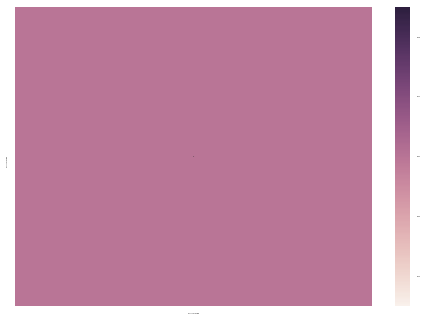

In [27]:
corr = data.corr()
sns.set(font_scale=0.2)
sns.heatmap(corr, annot=True)
# plt.savefig("Q4 Predictive model/corr", format='png', dpi=400)

In [0]:
columns = np.full((corr.shape[0],), True, dtype=bool)
drop_columns = np.full((corr.shape[0],), False, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.9:
            if columns[j]:
                columns[j] = False
                drop_columns[j] = True
selected_columns = data.columns[columns]
not_selected_columns = data.columns[drop_columns]
data = data[selected_columns]

In [26]:
not_selected_columns

Index([], dtype='object')

In [0]:
data = pd.read_csv('data/round8/csv/business.csv', low_memory=False)
data = data[data['state'].astype(str).str.contains('AZ')]

In [0]:
data.head()

In [0]:
######## select columns #######
columns_need = ['categories', 'city', 'state']
data = data[columns_need]

In [0]:
####### process categories #######
def getCatagories(df):
    
    df = df.dropna().reset_index(drop = True)
    catgories_list = [df[i].split(",") for i in range(df.shape[0])]
    catagories = np.unique(list(itertools.chain.from_iterable(catgories_list)))
    catagories = [tag for tag in catagories if len(tag) > 0]
    
    return catagories
    
    
# one hot catagories
catagories = getCatagories(data["categories"])
data["categories"] = data["categories"].fillna("") 

for tag in catagories:
    col_name = "categories_" + tag
    data[col_name] = data["categories"].map(lambda x: 1 if tag in x.split(",") else 0)
    
data = data.drop(['categories'], axis=1)

In [0]:
data.shape

(36500, 1787)

In [0]:
business.shape

(36500, 71)

In [0]:
####### process attributes #######
result = pd.concat([data.reset_index(drop=True), business.reset_index(drop=True)], axis= 1)

In [0]:
result.shape

(36500, 1858)

In [0]:
def onehot_encoding(dataset,columns):
    dataset = pd.get_dummies(dataset, columns=columns)
    return dataset
  
# columns_to_onehot = list(business.columns).append(['city','state'])
# data = onehot_encoding(result,columns_to_onehot)
columns_to_onehot = list(business.columns)
data = onehot_encoding(business,columns_to_onehot)

In [0]:
x = data.replace(np.nan, 0, regex=True)

In [30]:
x.shape

(9427, 79)

In [0]:
data = pd.read_csv('data/round8/csv/business.csv', low_memory=False)
data = data[data['state'].astype(str).str.contains('AZ')]
data = data[data['categories'].str.contains("Restaurants")]
y = data['stars']

In [32]:
y.shape

(9427,)

In [0]:
x.to_csv('x_round8.csv', encoding='utf-8', index=False)
y.to_csv('y_round8.csv', encoding='utf-8', index=False)

# Predict

In [0]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from  sklearn.neural_network import MLPClassifier
#from xgboost import XGBClassifier
import os
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import make_scorer
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import random
import matplotlib.pyplot as plt
#from fastFM.mcmc import FMClassification
import sys
sys.setrecursionlimit(10000)
from sklearn import svm
from sklearn.ensemble import AdaBoostClassifier
from sklearn import preprocessing

In [0]:
import re
regex = re.compile(r"\[|\]|<", re.IGNORECASE)
x.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in x.columns.values]

In [0]:
####### divide train and validation #######
# x  = pd.read_csv("business_one_hot.csv")
# y = pd.read_csv('business.csv')['stars']
x_train =  x[:int(len(x)/5*4)]
x_validation =x[int(len(x)/5*4):]
y_train = y[:int(len(y)/5*4)]
y_validation = y[int(len(y)/5*4):]

In [0]:
y_train
rates = set(y_train)

In [37]:
rates

{1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0}

In [0]:
x_train.head()

,Accepts Credit Cards_False,Accepts Credit Cards_True,Alcohol_beer_and_wine,Alcohol_full_bar,Alcohol_none,Ambience.casual_False,Ambience.casual_True,Ambience.classy_False,Ambience.classy_True,Ambience.divey_False,Ambience.divey_True,Ambience.hipster_False,Ambience.hipster_True,Ambience.intimate_False,Ambience.intimate_True,Ambience.romantic_False,Ambience.romantic_True,Ambience.touristy_False,Ambience.touristy_True,Ambience.trendy_False,Ambience.trendy_True,Ambience.upscale_False,Ambience.upscale_True,Attire_casual,Attire_dressy,Attire_formal,Caters_False,Caters_True,Delivery_False,Delivery_True,Good For Groups_False,Good For Groups_True,Good For.breakfast_False,Good For.breakfast_True,Good For.brunch_False,Good For.brunch_True,Good For.dessert_False,Good For.dessert_True,Good For.dinner_False,Good For.dinner_True,Good For.latenight_False,Good For.latenight_True,Good For.lunch_False,Good For.lunch_True,Good for Kids_False,Good for Kids_True,Has TV_False,Has TV_True,Noise Level_average,Noise Level_loud,Noise Level_quiet,Noise Level_very_loud,Outdoor Seating_False,Outdoor Seating_True,Parking.garage_False,Parking.garage_True,Parking.lot_False,Parking.lot_True,Parking.street_False,Parking.street_True,Parking.valet_False,Parking.valet_True,Parking.validated_False,Parking.validated_True,Price Range_1.0,Price Range_2.0,Price Range_3.0,Price Range_4.0,Take-out_False,Take-out_True,Takes Reservations_False,Takes Reservations_True,Waiter Service_False,Waiter Service_True,Wheelchair Accessible_False,Wheelchair Accessible_True,Wi-Fi_free,Wi-Fi_no,Wi-Fi_paid
0,0,1,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,1,0,0,1,0,0,1,0,1,0,0,1,1,0,1,0,1,0,1,0,0,0,0,1,1,0,1,0,0,1,0,1,0
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0
2,0,1,0,1,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,0,0,1,0,1,0,1,1,0,1,0,1,0,1,0,1,0,0,0,1,0,0,1,1,0,0,1,0,1,0
3,0,1,0,1,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,0,1,1,0,0,1,1,0,1,0,1,0,0,1,1,0,1,0,0,1,0,1,1,0,0,0,0,1,1,0,0,1,1,0,1,0,1,0,0,1,0,0,0,1,0,1,0,1,0,1,1,0,0
4,0,1,0,1,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,0,0,1,1,0,1,0,1,0,0,1,1,0,1,0,0,1,0,1,1,0,0,0,0,1,0,1,1,0,1,0,1,0,1,0,0,1,0,0,0,1,0,1,0,1,0,1,0,1,0


## XGBoost

In [0]:
from xgboost import XGBRegressor
from xgboost import XGBClassifier
# accuracy = accuracy_score(prediction, labels_test)
# Parameter Tuning

model = XGBClassifier(n_estimators = 100, max_depth = 7, learning_rate = 0.1, objective= 'multi:softmax', num_class = 9)
# model = xgb.XGBClassifier(max_depth=50, min_child_weight=1,  n_estimators=200,\
#                           n_jobs=-1 , verbose=1,learning_rate=0.1)
# model = xgb.XGBClassifier(max_depth=3, min_child_weight=1,  n_estimators=200,\
#                           n_jobs=-1 , verbose=1,learning_rate=0.1)

# model = xgb.XGBClassifier(
#   silent=0 ,#设置成1则没有运行信息输出，最好是设置为0.是否在运行升级时打印消息。
#   n_jobs=-1, 
#   learning_rate= 0.06, # 如同学习率
#   min_child_weight=9, 
#   # 这个参数默认是 1，是每个叶子里面 h 的和至少是多少，对正负样本不均衡时的 0-1 分类而言
#   #，假设 h 在 0.01 附近，min_child_weight 为 1 意味着叶子节点中最少需要包含 100 个样本。
#   #这个参数非常影响结果，控制叶子节点中二阶导的和的最小值，该参数值越小，越容易 overfitting。
#   max_depth=7, # 构建树的深度，越大越容易过拟合
#   gamma=0.1,  # 树的叶子节点上作进一步分区所需的最小损失减少,越大越保守，一般0.1、0.2这样子。
#   subsample=0.95, # 随机采样训练样本 训练实例的子采样比
#   max_delta_step=0,#最大增量步长，我们允许每个树的权重估计。
#   colsample_bytree=0.7, # 生成树时进行的列采样 
#   reg_lambda = 1,  # 控制模型复杂度的权重值的L2正则化项参数，参数越大，模型越不容易过拟合。
#   reg_alpha=1, # L1 正则项参数
#   scale_pos_weight=1, #如果取值大于0的话，在类别样本不平衡的情况下有助于快速收敛。平衡正负权重
#   #objective= 'multi:softmax', #多分类的问题 指定学习任务和相应的学习目标
#   #num_class=10, # 类别数，多分类与 multisoftmax 并用
#   n_estimators=320, #树的个数
#   seed=0, #随机种子
#   verbose=1
#   #eval_metric= 'auc'
# )


model.fit(x_train,y_train*2)
validation_predictions=model.predict(x_validation)
validation_predictions = pd.DataFrame(validation_predictions)
validation_predictions = validation_predictions/2


In [0]:
validation_predictions

### Evaluation

In [0]:
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelBinarizer

In [0]:
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    lb = LabelBinarizer()
    lb.fit(y_test)
    
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)
    
    return roc_auc_score(y_test, y_pred, average=average)

In [0]:
# Accurancy
# validation_predictions = pd.DataFrame(validation_predictions)
roc_auc = multiclass_roc_auc_score(y_validation*2, validation_predictions*2)

In [0]:
roc_auc

0.5559863440968235

## Randomforest

In [0]:
def randomforest(x_train,y_train,Validation_x, n_estimators = 100, max_depth = 3,  min_samples_split = 6 , min_samples_leaf = 4, random_state = 500 ):
    rf = RandomForestClassifier(n_estimators=n_estimators,random_state = random_state)
    
#     lab_enc = preprocessing.LabelEncoder()
#     training_scores_encoded = lab_enc.fit_transform(y_train)
#     rf_model = rf.fit(x_train, training_scores_encoded)
    y_train = y_train*2
    rf_model = rf.fit(x_train, y_train)
    
    rf_p = rf_model.predict(Validation_x)
    rf_p = pd.DataFrame(rf_p)
    RF = rf_p/2
    return RF, rf

In [0]:
RF, rf = randomforest(x_train,y_train,x_validation, n_estimators = 100, max_depth = 5,  min_samples_split = 6, min_samples_leaf = 6, random_state = 500)

In [0]:
RF

### Evaluation

In [0]:
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelBinarizer

In [0]:
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    lb = LabelBinarizer()
    lb.fit(y_test)
    
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)
    
    return roc_auc_score(y_test, y_pred, average=average)

In [0]:
# Accurancy
roc_auc = multiclass_roc_auc_score(y_validation*2, RF*2)

In [0]:
roc_auc

0.5252215783585313

### 用randomforest fit 好的模型预测一下，准确度28%(use the fitted randomforest model to predict the test data, the accuracy is 28%, not very good)

In [0]:
from sklearn import preprocessing
from sklearn import utils

lab_enc = preprocessing.LabelEncoder()
y_1 = lab_enc.fit_transform(y_validation)

In [0]:
rf.score(x_validation,y_1)

0.1511134676564157

### 这个是看那些feature是被选择出来的(to see which features are selected)

In [41]:
print(rf.feature_importances_)

[0.00364934 0.00837203 0.01482494 0.01486133 0.02427583 0.013268
 0.01389176 0.00347168 0.00178387 0.0081993  0.0071783  0.00376333
 0.00204746 0.00356464 0.00142765 0.00326052 0.00107754 0.003202
 0.00056406 0.00451455 0.00271316 0.00455368 0.00072345 0.00928279
 0.0020982  0.00070747 0.02844279 0.02462812 0.02856041 0.02321132
 0.01933981 0.02132811 0.01338182 0.01119657 0.01069839 0.00764057
 0.00760448 0.00462136 0.01548421 0.01480864 0.00918208 0.00660482
 0.01702283 0.01776993 0.01458152 0.01755384 0.02609027 0.02391596
 0.03050785 0.01181364 0.02606345 0.00836452 0.03028086 0.02826101
 0.00677094 0.00401936 0.01371723 0.01475552 0.01076641 0.00915376
 0.00565735 0.00291546 0.00471738 0.00103019 0.02334454 0.02316768
 0.00423447 0.00100324 0.00663578 0.01270702 0.02020584 0.01635209
 0.0234161  0.01882794 0.00930708 0.04119569 0.02952835 0.03850577
 0.00182876]


### 这个是将feature importance可视化了(this is to visualized the feature importance)

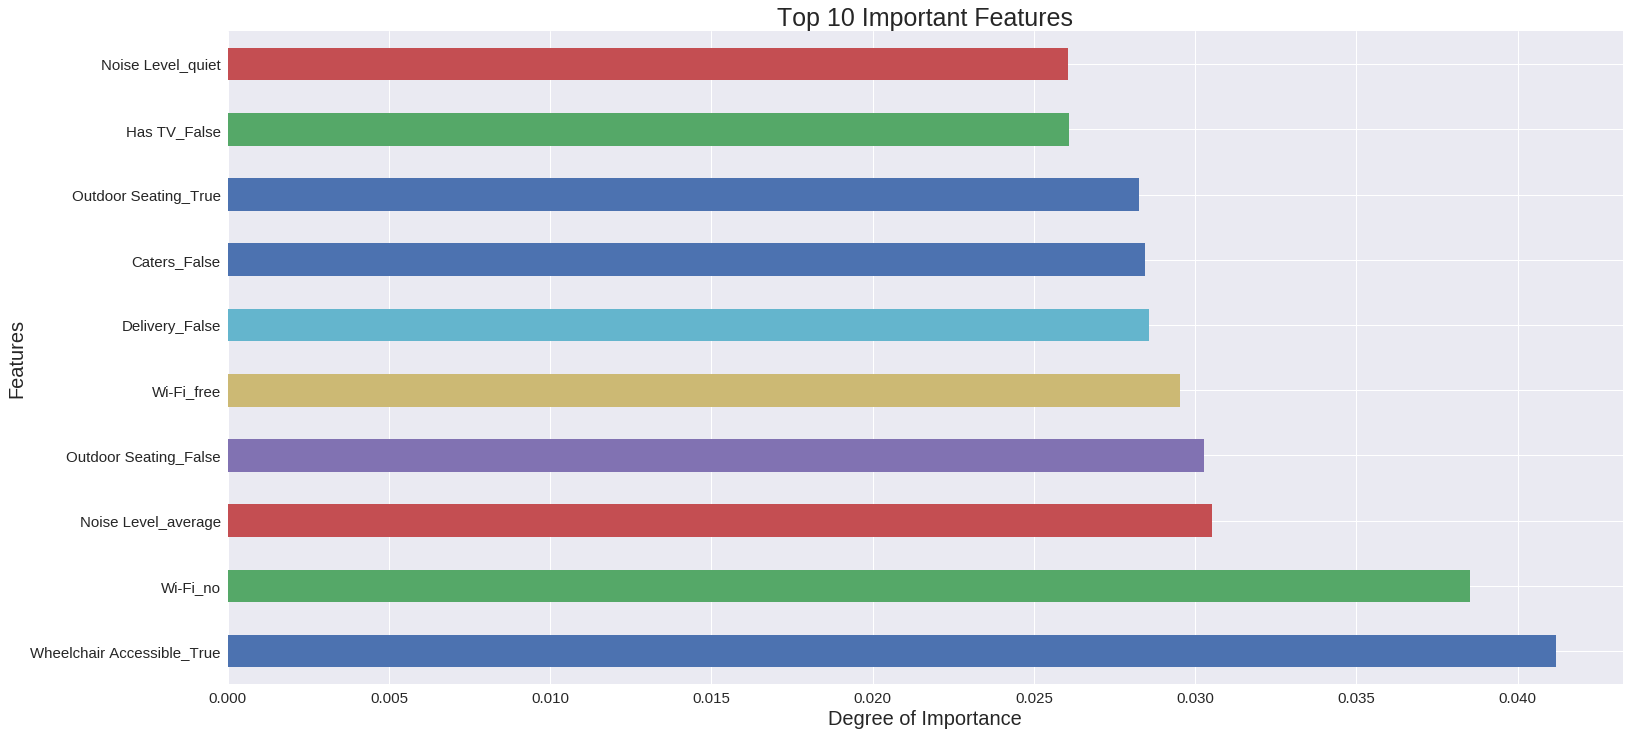

In [59]:
plt.figure(figsize=(25, 12))
feat_importances = pd.Series(rf.feature_importances_, index=x_train.columns)
feat_importances.nlargest(10).plot(kind='barh')

plt.ylabel('Features',fontsize = 20)
plt.xlabel('Degree of Importance',fontsize = 20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Top 10 Important Features',fontsize = 25 )
plt.savefig('Q4 Predictive model/feature importance5.png', dpi = 400)
plt.show()

<font face="微软雅黑" size=6 color=#000000> Prediction Example

In [0]:
 pd.Series(rf.feature_importances_, index=x_train.columns).nlargest(10)

Wheelchair Accessible_True    0.041196
Wi-Fi_no                      0.038506
Noise Level_average           0.030508
Outdoor Seating_False         0.030281
Wi-Fi_free                    0.029528
Delivery_False                0.028560
Caters_False                  0.028443
Outdoor Seating_True          0.028261
Has TV_False                  0.026090
Noise Level_quiet             0.026063
dtype: float64

In [0]:
############################################################
######### Restaurants #########################################
############################################################

# add your attribute here
# city/state/categories/attribute
predict_target  = pd.DataFrame().reindex_like(pd.DataFrame(x.loc[1])).fillna(0).T


predict_target['state_AZ'] = 1

predict_target['categories_Restaurants'] = 1

predict_target['Wheelchair Accessible_True'] = 1

predict_target['Wi-Fi_free'] = 1
predict_target['Noise Level_average'] = 1

predict_target['Outdoor Seating_True']  = 1

predict_target['Delivery_True'] = 1
predict_target['Caters_True'] = 1
predict_target['Has TV_True'] = 1






In [0]:
predict_target  = pd.DataFrame().reindex_like(pd.DataFrame(x.loc[1])).fillna(0).T

In [0]:
rf_p = rf.predict(predict_target)
rf_p = pd.DataFrame(rf_p)
rf_p/2

,0
0,2.0
